In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


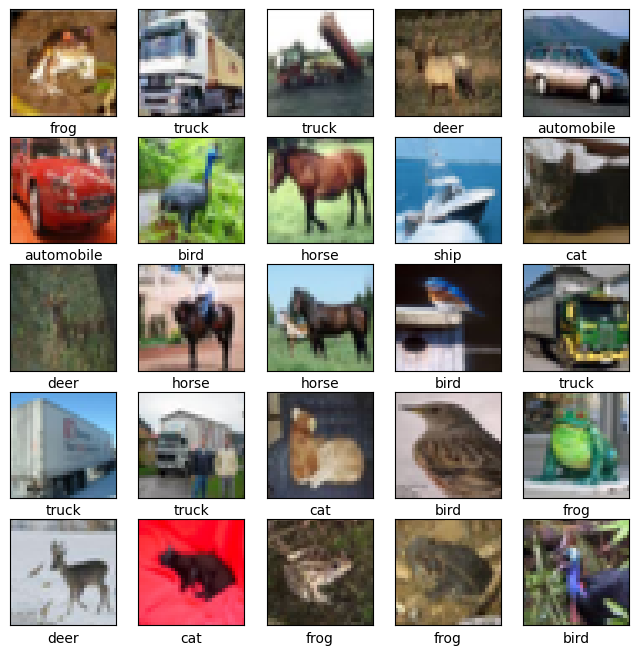

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.35),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


c:\Users\KAUSHIK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,178 (1.39 MB)

 Trainable params: 362,538 (1.38 MB)

 Non-trainable params: 640 (2.50 KB)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3)


In [8]:
layers.BatchNormalization()


<BatchNormalization name=batch_normalization_5, built=False>

In [25]:
# Further reduce batch size to lower memory usage
history = model.fit(datagen.flow(x_train, y_train, batch_size=25),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, lr_reduce])


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 118s 59ms/step - accuracy: 0.5185 - loss: 1.3498 - val_accuracy: 0.6214 - val_loss: 1.0810 - learning_rate: 0.0010
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 121s 60ms/step - accuracy: 0.5909 - loss: 1.1645 - val_accuracy: 0.6361 - val_loss: 1.0489 - learning_rate: 0.0010
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 119s 60ms/step - accuracy: 0.6285 - loss: 1.0660 - val_accuracy: 0.6230 - val_loss: 1.1251 - learning_rate: 0.0010
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 120s 60ms/step - accuracy: 0.6534 - loss: 1.0002 - val_accuracy: 0.6393 - val_loss: 1.0786 - learning_rate: 0.0010
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 120s 60ms/step - accuracy: 0.6587 - loss: 0.9648 - val_accuracy: 0.7193 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 120s 60ms/step - accuracy: 0.6827 - loss: 0.9241 - val_accuracy: 0.6977 - val_loss: 0.8868 - learning_rate: 0.0010
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 122s 61ms/step -

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)


313/313 - 4s - 12ms/step - accuracy: 0.7474 - loss: 0.7361
Test Accuracy: 0.7473999857902527


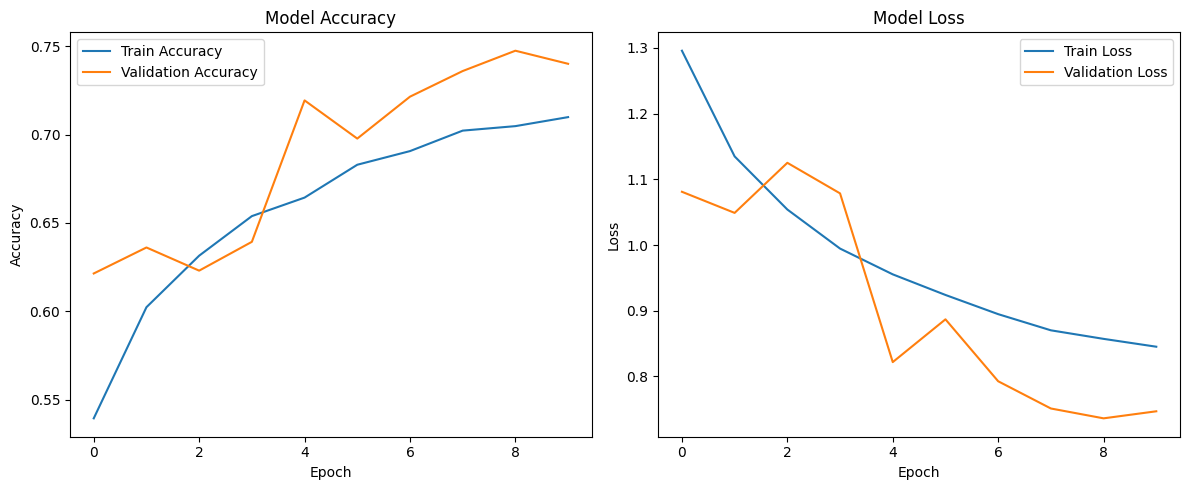

In [27]:
import matplotlib.pyplot as plt

# Check if 'history' is defined
if 'history' not in locals():
	raise NameError("The variable 'history' is not defined. Please run the cell where model.fit() is called.")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


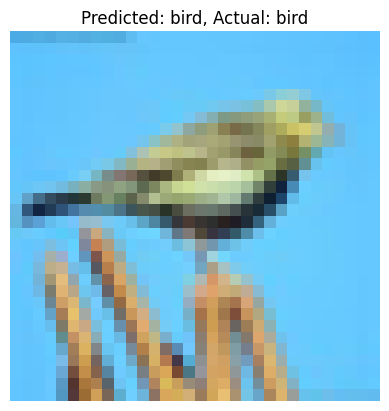

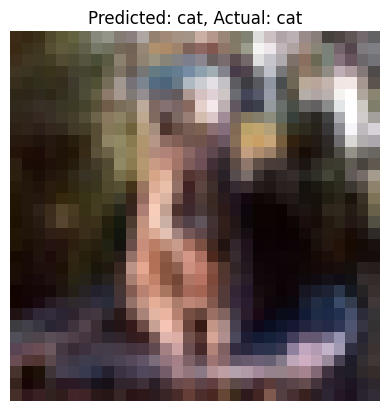

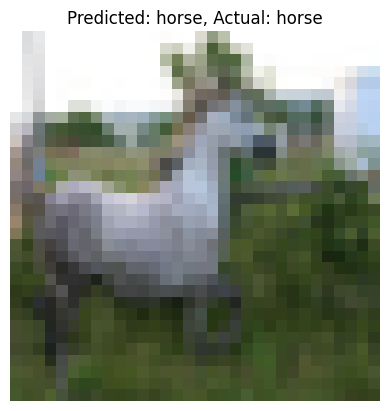

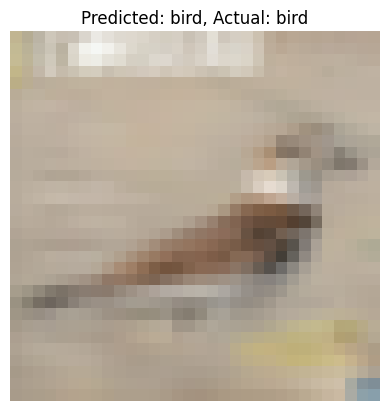

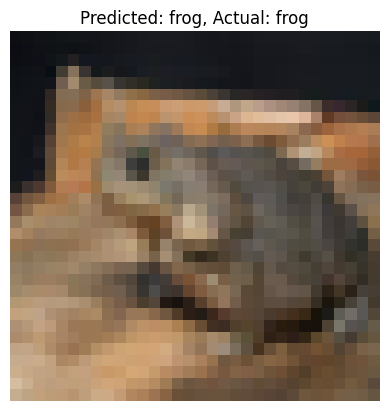

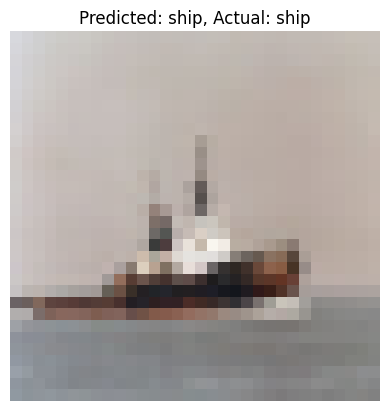

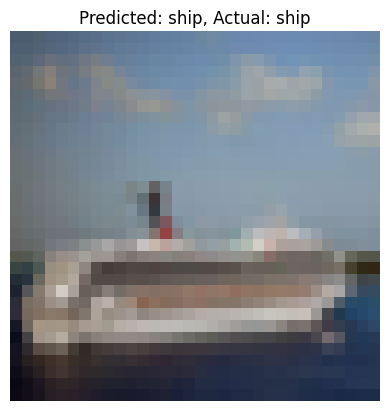

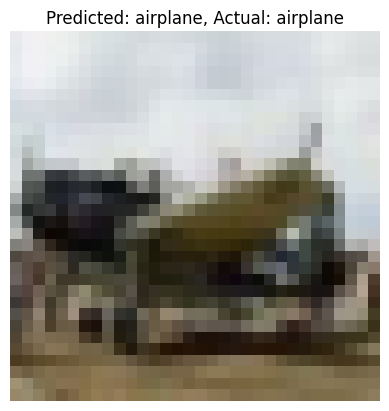

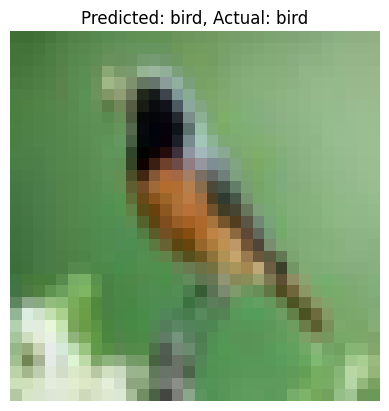

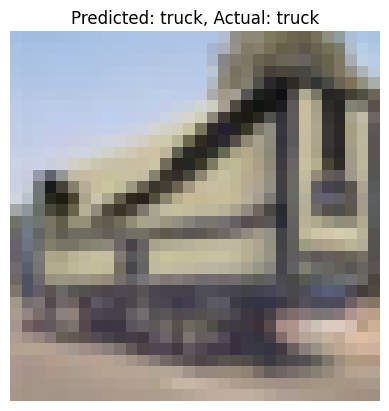

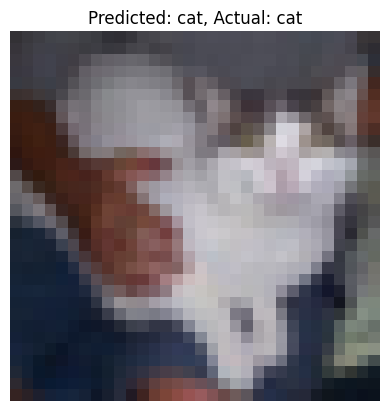

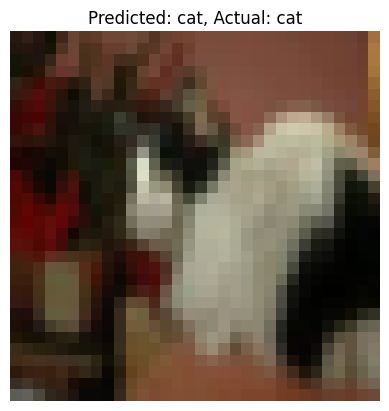

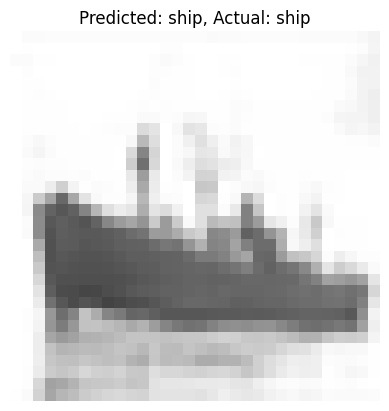

In [36]:
# Make predictions
predictions = model.predict(x_test)
# Display predictions for the first 5 test images
for i in range(67,80):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[predictions[i].argmax()]}, Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()
# Save the model
model.save('cifar10_model.h5')
# Load the model (if needed)
# loaded_model = models.load_model('cifar10_model.h5')
# loaded_model.summary()
# Make predictions with the loaded model